## Bonus
As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:

from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/<SQL-Challenge>')
connection = engine.connect()
Consult SQLAlchemy documentation for more information.

If using a password, do not upload your password to your GitHub repository. See https://www.youtube.com/watch?v=2uaTPmNvH0I and https://martin-thoma.com/configuration-files-in-python/ for more information.

Create a histogram to visualize the most common salary ranges for employees.

Create a bar chart of average salary by title.

In [116]:
#get dependencies
%matplotlib inline
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
from config import pword

In [118]:
#create engine 
engine = create_engine('postgresql://localhost:5432/SQL-Challenge?user=postgres&password='+pword)

In [119]:
#connect to database
conn = engine.connect()

In [40]:
#upload data to pandas
employees = pd.read_sql("SELECT * FROM employees", conn)
title = pd.read_sql("SELECT * FROM titles", conn)
salaries = pd.read_sql("SELECT * FROM salaries", conn)

In [41]:
#Check salary range
print("The max salary is " + str(salaries["salary"].max()))
print("The min salary is " + str(salaries["salary"].min()))

The max salary is 129492
The min salary is 40000


In [78]:

#create bins
bins = [39999, 50000, 60000, 70000, 80000, 90000, 100000, 110000,120000, 130000]

#check count in bins
group_names = ["$40k", "$50k", "$60k", "$70k","$80k","$90k", "$100k", "$110k", "$120k" ]
salaries["Salary Range"] = pd.cut(salaries["salary"], bins, labels=group_names)
salaries.head()
count = salaries.groupby("Salary Range").count()
count

,emp_no,salary,from_date,to_date
Salary Range,,,,
$40k,158472,158472,158472,158472
$50k,57917,57917,57917,57917
$60k,41405,41405,41405,41405
$70k,24814,24814,24814,24814
$80k,11844,11844,11844,11844
$90k,4285,4285,4285,4285
$100k,1068,1068,1068,1068
$110k,195,195,195,195
$120k,24,24,24,24


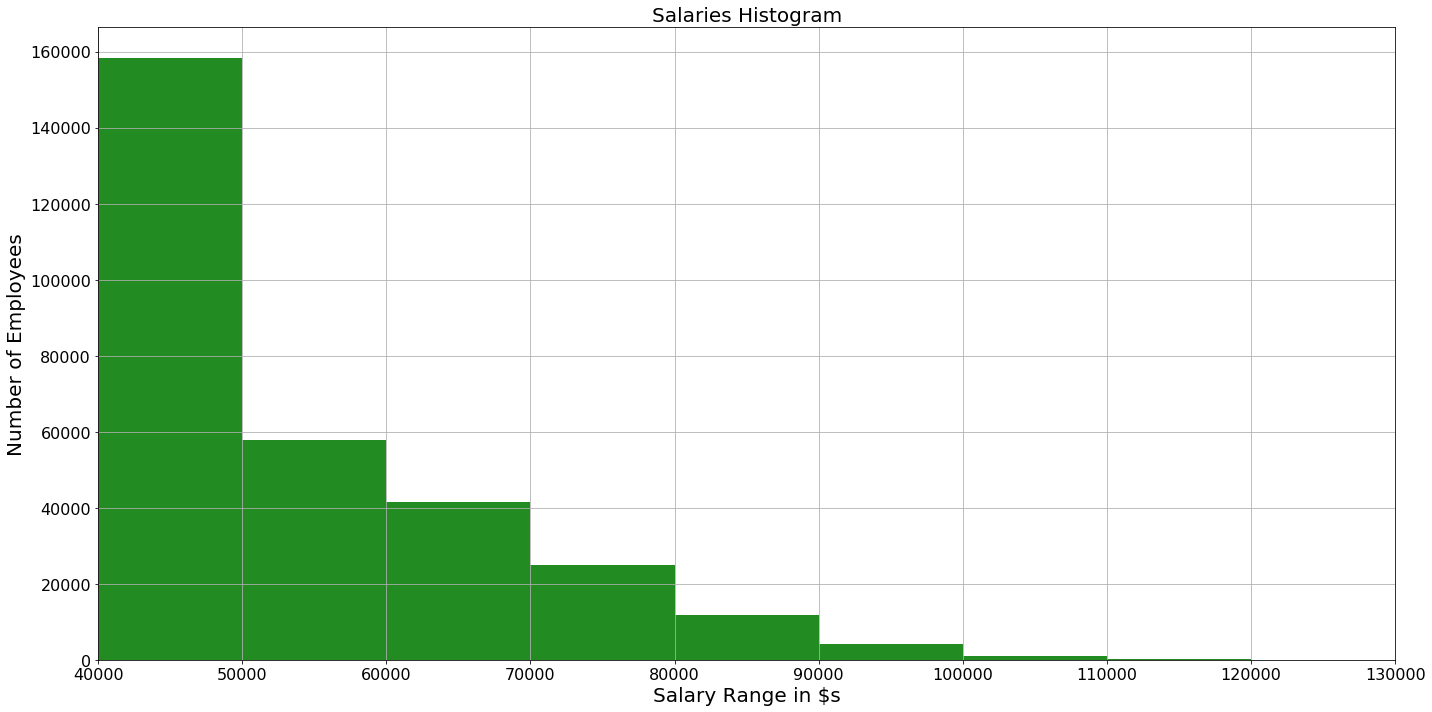

In [111]:
#plot histogram
x = salaries["salary"]
plt.figure(figsize=(20,10))
plt.hist(x, bins = bins, align = "mid", color="forestgreen")
#plt.xticks(np.arange(7), ('$40k', '$50k', '$60k', '$70k', '$80k', '$90k', '$100k+'))
plt.title("Salaries Histogram", fontsize=20)
plt.xlabel("Salary Range in $s", fontsize=20)
plt.ylabel("Number of Employees", fontsize=20)
plt.xlim(40000,130000)
plt.xticks(fontsize =16)
plt.yticks(fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig("Screen_shots/histogram.png")
plt.show()

In [76]:
#merge title and salary df's
combined = pd.merge(title, salaries, on='emp_no')
combined.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y,Salary Range
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26,$60k
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03,$60k
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02,$40k
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01,$40k
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01,$40k


In [84]:
#calculate average salary for each title using groupby
avg_sal = combined.groupby('title')[['salary']].mean().reset_index()

In [85]:
#check new df
avg_sal

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


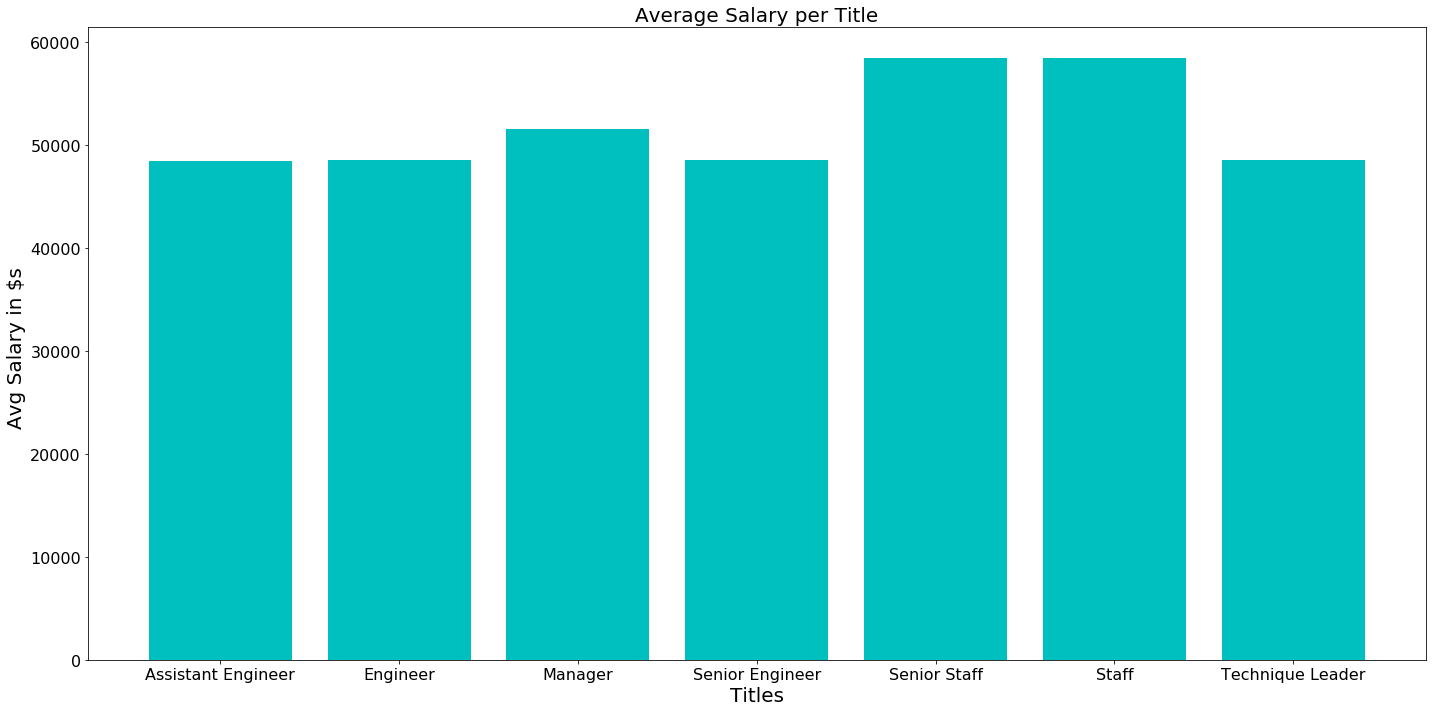

In [114]:
#plot bar chart
bar_x = avg_sal["title"]
bar_y = avg_sal["salary"]
plt.figure(figsize=(20,10))
plt.bar(bar_x,bar_y, color ="c")
plt.title("Average Salary per Title", fontsize=20)
plt.xlabel("Titles", fontsize=20)
plt.ylabel("Avg Salary in $s ", fontsize=20)
plt.xticks(fontsize =16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig("Screen_shots/bar_chart.png")
plt.show()

In [121]:
print("OBSERVATIONS")
print("--------------")
print("The salary histogram shows a typical pay structure where there are a small number of senior managers \n"
"making a high salary and a large number of lower level employees making a lower salary.")
print("However, when looking at average salary by title, the senior and manager positions are making roughly the same\n"
     "amount as the junior staff. It appears salaries and titles were randomly assigned to employees in this database.")
print("Happy April Fool's Day...")

OBSERVATIONS
--------------
The salary histogram shows a typical pay structure where there are a small number of senior managers 
making a high salary and a large number of lower level employees making a lower salary.
However, when looking at average salary by title, the senior and manager positions are making roughly the same
amount as the junior staff. It appears salaries and titles were randomly assigned to employees in this database.
Happy April Fool's Day...
